In [1]:
import matplotlib.pyplot as plt

def grid_plot(elements, width, height, make_plot, figsize = (20, 20)):
    if (width * height < len(elements)): raise ValueError("Insufficient room in the grid")
    fig, axes = plt.subplots(height, width, figsize = figsize)
    for index, element in enumerate(elements):
        ax=axes[index // width][index % width]
        make_plot(ax, element, index)
    return axes


In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)


4422102/4422102 [==============================] - 0s 0us/step


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

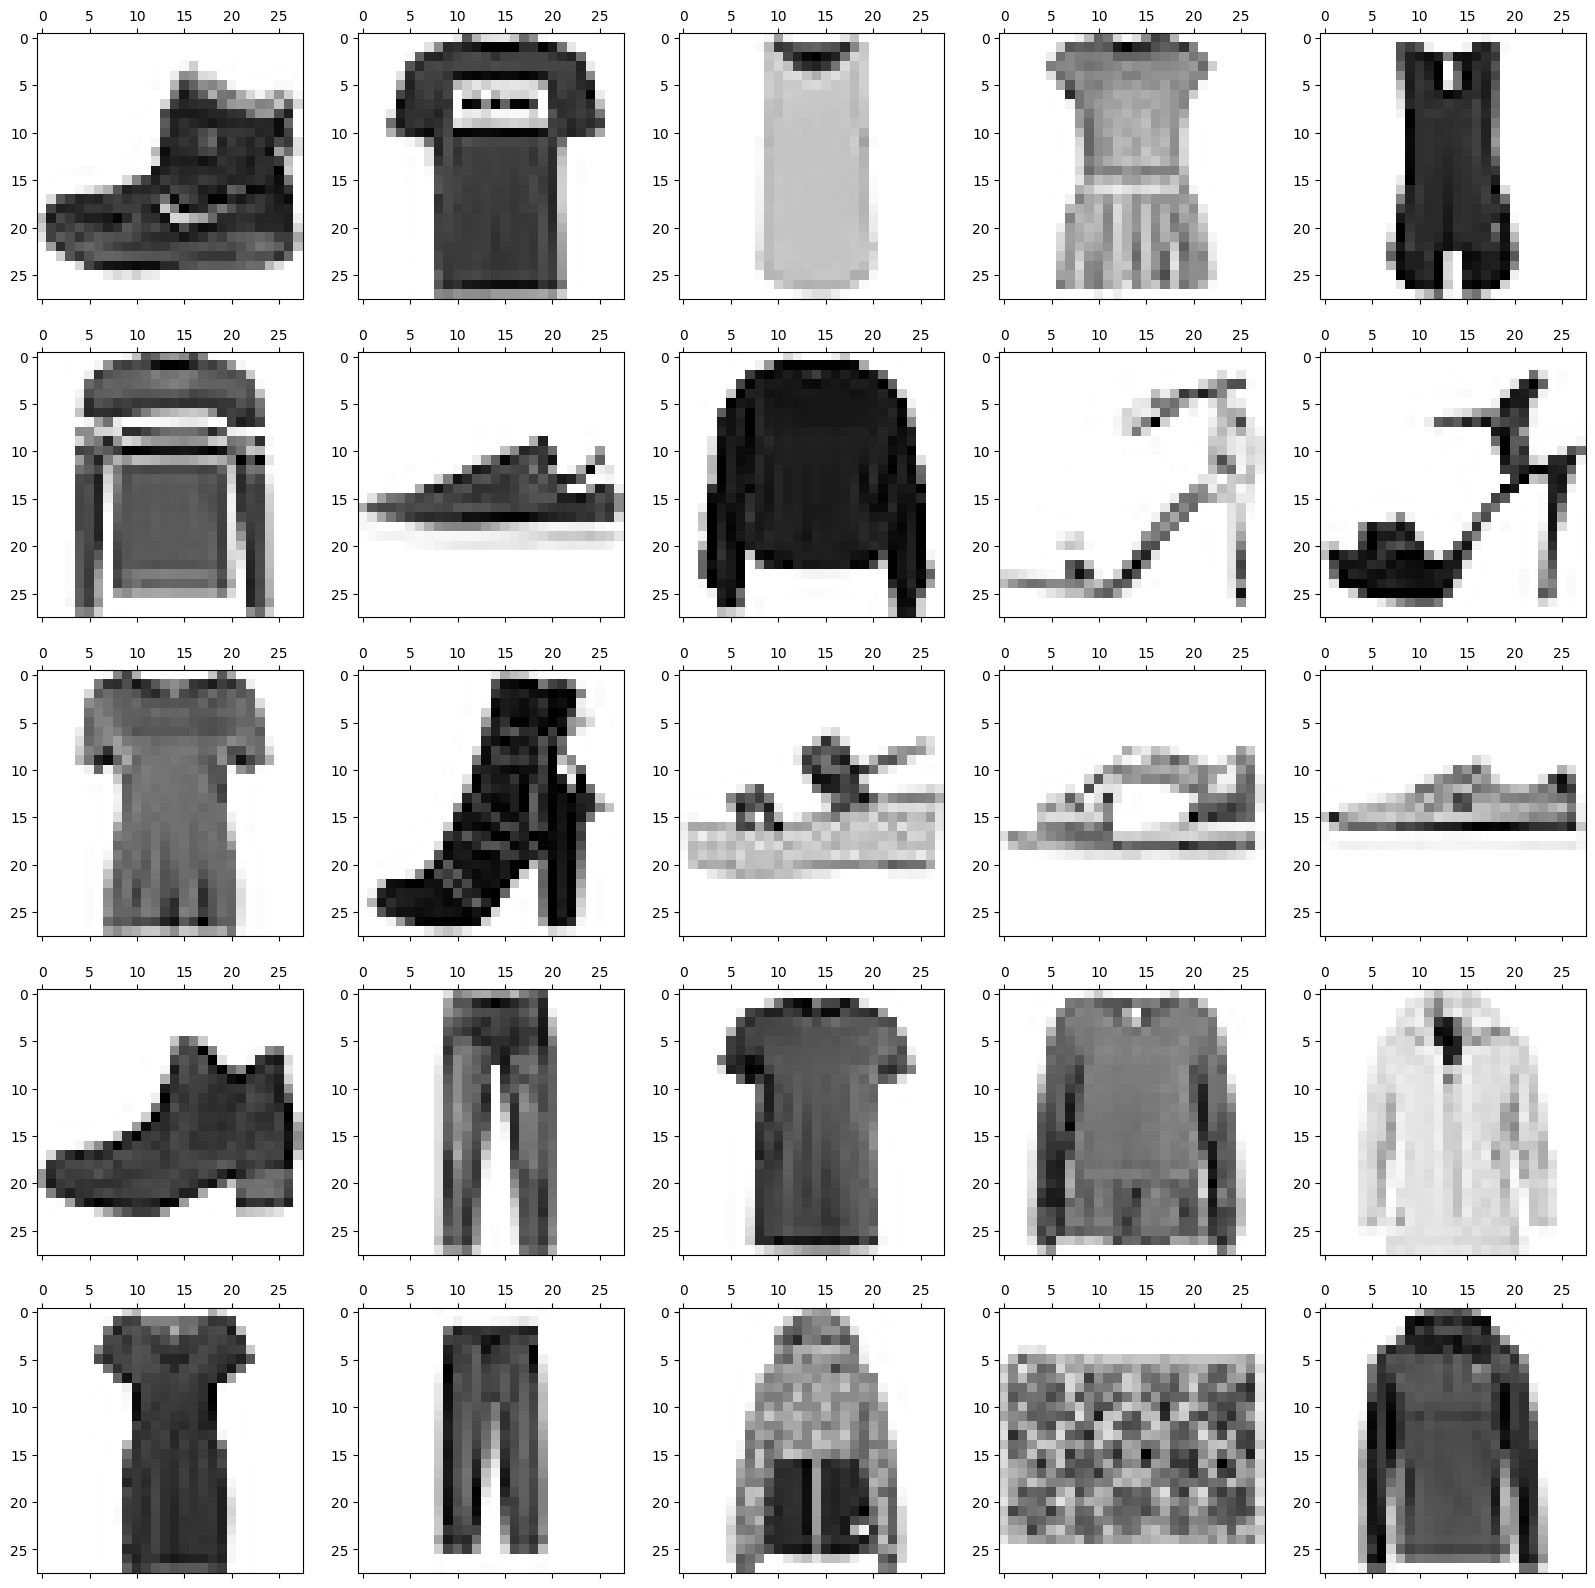

In [3]:
def plot_pc(ax, num, index):
    num_grid = num.reshape(28, -1)

    ax.matshow(num_grid, cmap='Greys')

grid_plot(X_train[0:5*5], 5, 5, plot_pc)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.8497)

In [5]:
def plot_results(train_score, test_score, train_label = None, test_label = None, xlabel = None, ylabel = None, xvalues = None, ax = None):
    if not ax:
        fig, ax = plt.subplots(1, 1)
    if not xvalues: xvalues = range(1, len(train_score) + 1)
    ax.plot(xvalues,train_score,'-', label = train_label)
    ax.plot(xvalues,test_score,'-', label = test_label)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    if xlabel or ylabel: ax.legend()


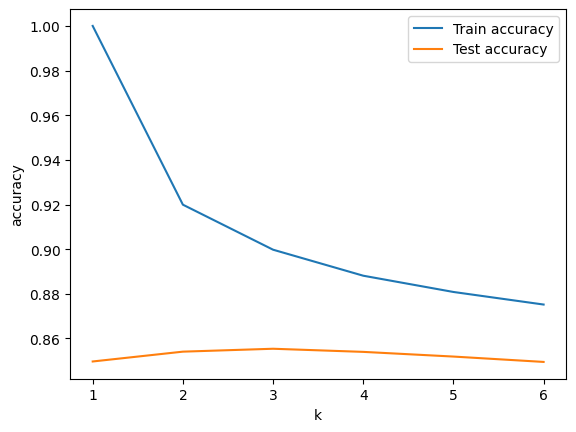

In [7]:
ks = [1, 3, 5, 7, 9, 11]

classifiers = [KNeighborsClassifier(n_neighbors=k) for k in ks]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
test_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, test_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="k", ylabel="accuracy")